In [2]:
import warnings

warnings.filterwarnings("ignore")

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("NCAA_D1_Trackman_2022_Modified.csv")
df.head()

,PitcherThrows,BatterSide,Outs,Balls,Strikes,AutoPitchType,PitchCall,TaggedHitType,PlayResult,OutsOnPlay,...,League,AutoHitType,HitSpinAxis,HitType,HitDir,hx,hy,AngleCats,exitVeloCats,InKZone
0,Right,Right,0,0,0,Sinker,InPlay,GroundBall,Out,1,...,BW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
1,Right,Right,1,1,0,Sinker,InPlay,FlyBall,Out,1,...,BW,FlyBall,215.204047,FlyBall,Right,171.175482,256.272677,> 30,95-105,YES
2,Right,Left,0,2,2,Four-Seam,InPlay,LineDrive,Out,2,...,BW,LineDrive,324.642845,LowLineDrive,Center,38.118308,162.119080,10-20 (w/ 10),95-105,YES
3,Right,Right,2,1,0,Four-Seam,InPlay,GroundBall,Single,0,...,BW,GroundBall,NaN,GroundBall,Left,-10.165228,18.390056,< 10,85-95,YES
4,Right,Right,1,1,2,Four-Seam,InPlay,GroundBall,Out,1,...,BW,GroundBall,NaN,GroundBall,Center,0.947038,10.340031,< 10,85-95,YES


In [7]:
df.shape

(158978, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158978 entries, 0 to 158977
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PitcherThrows   158978 non-null  object 
 1   BatterSide      158978 non-null  object 
 2   Outs            158978 non-null  int64  
 3   Balls           158978 non-null  int64  
 4   Strikes         158978 non-null  int64  
 5   AutoPitchType   156667 non-null  object 
 6   PitchCall       158978 non-null  object 
 7   TaggedHitType   158978 non-null  object 
 8   PlayResult      158978 non-null  object 
 9   OutsOnPlay      158978 non-null  int64  
 10  PlateLocHeight  158005 non-null  float64
 11  PlateLocSide    158005 non-null  float64
 12  ExitSpeed       149733 non-null  float64
 13  Angle           149733 non-null  float64
 14  Direction       149733 non-null  float64
 15  HitSpinRate     93289 non-null   float64
 16  Distance        139116 non-null  float64
 17  Bearing   

In [6]:
df[["ExitSpeed", "Angle", "PlayResult"]].head()

,ExitSpeed,Angle,PlayResult
0,NaN,NaN,Out
1,95.92987,38.618208,Out
2,102.83438,11.431053,Out
3,94.99018,-8.380599,Single
4,94.06619,-19.599595,Out


In [8]:
df["PlayResult"].unique()

array(['Out', 'Single', 'Error', 'FieldersChoice', 'HomeRun', 'Sacrifice',
       'Triple', 'Double', 'FlyBall', 'Fielderschoice', 'Undefined',
       'GroundBall', 'Homerun', 'Popup'], dtype=object)

In [ ]:
out = ["Popup, Fielder Choice, Flyball, Groundball"]

In [39]:
df["PlayResult"].replace(to_replace=("Popup", "FieldersChoice", "Sacrifice","Fielderschoice", "FlyBall", "GroundBall", "Undefined"), value="Out", inplace=True)
df["PlayResult"] = df["PlayResult"].apply(lambda x: "HomeRun" if x == "Homerun" else x)
df["PlayResult"].unique()

array(['Out', 'Single', 'Error', 'HomeRun', 'Triple', 'Double'],
      dtype=object)

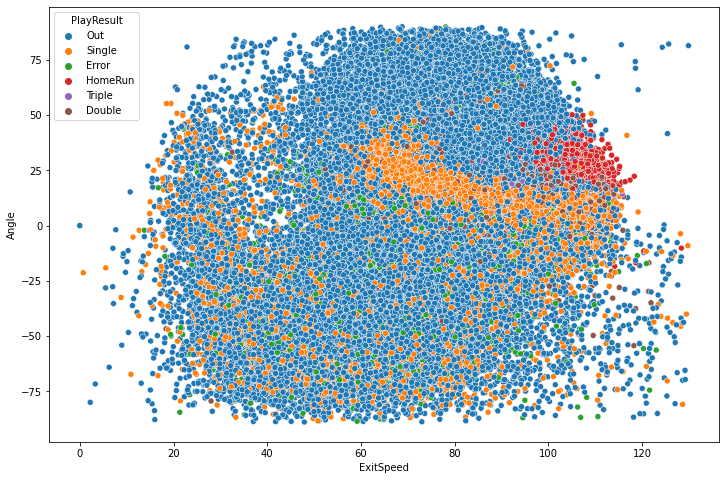

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="ExitSpeed", y="Angle" ,data=df, hue="PlayResult")
plt.show()

### Q1: What observations can you make?

## Ans
Observation: Based on the angle and velocity more ball are played out

In [24]:
one = ["Single", 'Triple', 'Double', "HomeRun"]

In [25]:
df["Outcome"] = df["PlayResult"].apply(lambda x : 1 if x in one else 0)

In [26]:
df["Outcome"].value_counts()

0    103090
1     55888
Name: Outcome, dtype: int64

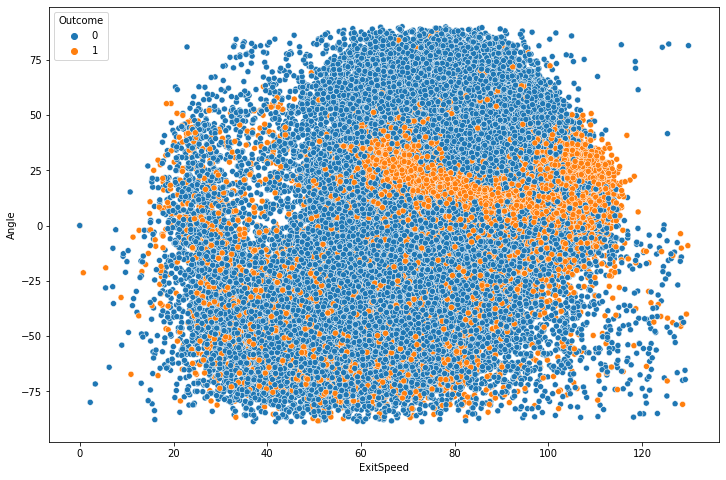

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="ExitSpeed", y="Angle", data=df, hue="Outcome")
plt.show()

## Q2: What observations can you make?

In [38]:
pd.DataFrame(df.groupby(by=["exitVeloCats", "AngleCats"])["Outcome"].mean()).reset_index().rename(columns={"Outcome": "Perct_Hit"})

,exitVeloCats,AngleCats,Perct_Hit
0,75-85,10-20 (w/ 10),0.808054
1,75-85,20-30 (w/ 20),0.341455
2,75-85,< 10,0.232927
3,75-85,> 30,0.042298
4,85-95,10-20 (w/ 10),0.716870
5,85-95,20-30 (w/ 20),0.218681
6,85-95,< 10,0.378352
7,85-95,> 30,0.068754
8,95-105,10-20 (w/ 10),0.687722
9,95-105,20-30 (w/ 20),0.596782


## Q3: What observations can you make?

Exit Velocity of 75-85 and Launch Angle of greater than 30 has the lowest Hit percentage

In [42]:
df["PlayResult"].unique()

array(['Out', 'Single', 'Error', 'HomeRun', 'Triple', 'Double'],
      dtype=object)

In [45]:
df["wOBA"] = df["PlayResult"].map({"Single":0.88, "Double":1.25, "Tripple":1.57, "HomeRun":2.01, "Out":0, "Error":0})

In [46]:
df["wOBA"].unique()

array([0.  , 0.88, 2.01,  nan, 1.25])

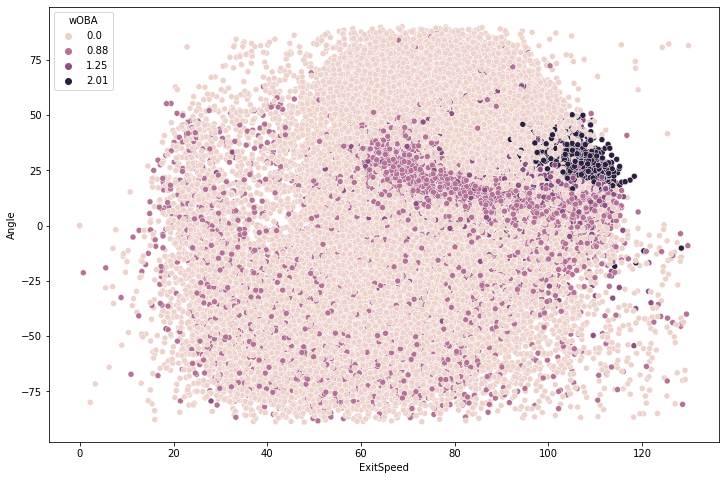

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="ExitSpeed", y="Angle", data=df, hue="wOBA", )
plt.show()

## Q4: What observations can you make

The WOBA value of 2 hyas the lowest data point

In [50]:
pd.DataFrame(df.groupby(by=["exitVeloCats", "AngleCats"])["wOBA"].mean()).reset_index().rename(columns={"wOBA": "Acg.wOBA"})

,exitVeloCats,AngleCats,Acg.wOBA
0,75-85,10-20 (w/ 10),0.738281
1,75-85,20-30 (w/ 20),0.326222
2,75-85,< 10,0.211597
3,75-85,> 30,0.042131
4,85-95,10-20 (w/ 10),0.682301
5,85-95,20-30 (w/ 20),0.273076
6,85-95,< 10,0.344384
7,85-95,> 30,0.098435
8,95-105,10-20 (w/ 10),0.710485
9,95-105,20-30 (w/ 20),0.988946


## Q5: What observations can you make?

Exit Velocity greater than 105 and Launce angle between 10 and 20 has the highest average WOBA

## Q6

**Player B** would perform better because the hit percentage of range of Exit Velocity and Launce ancgle is higher compare to **Player A**